In [1]:
from pathlib import Path
from typing import Union

import numpy as np
from astropy.io import fits

In [2]:
def pixel_signal(fpath: Union[str, Path], coord: tuple):
    fpath = Path(fpath)
    if fpath.suffix != '.fits':
        raise TypeError("The file must be in fits format.")
    with fits.open(fpath) as hdul:
        fits_file = hdul[0]
        data = fits_file.data[0][0]
    return data[coord[0], coord[1]]


def read_data(fpath: Union[str, Path]):
    fpath = Path(fpath)
    if fpath.suffix != '.fits':
        raise TypeError("The file must be in fits format.")
    with fits.open(fpath) as hdul:
        fits_file = hdul[0]
        data = fits_file.data[0][0]
    return data


def iterate_files(root: Union[str, Path], coord: tuple):
    root = Path(root)
    if not root.is_dir():
        raise TypeError("The root must be a directory.")
    data_list = []
    for _path in root.glob("*.fits"):
        data_list.append(read_data(_path))
    return data_list


def variance_nimages(root: Union[str, Path], coord: tuple):
    data_list = iterate_files(root, coord)
    return np.nanstd(data_list, 0)

In [5]:
from google.colab import drive #Mounting google drive.
drive.mount('/content/drive')

folder = Path('/content/drive/My Drive/ALMA_Image')
coord = (700, 700)

noise = variance_nimages(folder, coord)

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Central Noise:  1.14e-04


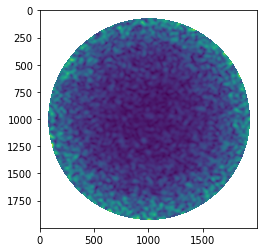

In [12]:
from matplotlib import pyplot as plt

print("Central Noise: ", f'{noise[1000, 1000]:.2e}')ß
plt.imshow(noise)
plt.show()